In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-72).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
openjdk version "11.0.18" 2023-01-17
OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)


In [2]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693440 sha256=2ac7c26eb9cb7003aac79e551513a372e90b5afe32a101f28e307568aaaa6a52
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [3]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpi4780hxo
  JVM stdout: /tmp/tmpi4780hxo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpi4780hxo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,5 hours and 2 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_tt1406
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = h2o.import_file('/content/drive/My Drive/MTR/Dataset_all.csv')
df = df.drop(['agddsat', 'pod_kgha'], axis=1)
df.head(2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


b1,b2,b3,b4,NDVI,NLI,GNDVI,MNLI,Savi,pmi_bb,pmi_ob,biomass_kgha
0.0204444,0.0475,0.0209222,0.560811,0.928069,0.875252,0.84383,0.561471,0.748644,0,0,10006.3
0.0315444,0.0517222,0.0337444,0.4204,0.851393,0.679358,0.780895,0.329444,0.607857,0.0162162,0.183784,7500.23


In [6]:
df.columns

['b1',
 'b2',
 'b3',
 'b4',
 'NDVI',
 'NLI',
 'GNDVI',
 'MNLI',
 'Savi',
 'pmi_bb',
 'pmi_ob',
 'biomass_kgha']

In [7]:
y = "biomass_kgha"

In [8]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [9]:
aml = H2OAutoML(max_runtime_secs=600, seed = 1, project_name = 'Pod2',exclude_algos = ["StackedEnsemble"], nfolds=5)
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |█
20:25:20.998: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230309_202517_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    23                 23                          4098                   5            8            5.82609       8             11            9.56522

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1610802.7139276548
RMSE: 1269.1740282276717
MAE: 973.33130130671
RMSLE: 0.20540314954548855
Mean Residual Deviance: 1610802.7139276548

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2735686.252234702
RMSE: 1653.9910073016424
MAE: 1287.847934645807
RMSLE: 0.2652745109419622
Mean Residual Deviance: 2735686.252234702

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1298.32      291.794      1128.25       1528.26       1029.38       1115.99       1689.74
mean_residual_deviance  2.81106e+06  1.36702e+06  1.89798e+06   3.90149e+06   1.84544e+06   1.75449e+06   4.65591e+06
mse                     2.81106e+06  1.36702e+06  1.89798e+06   3.90149e+06   1.84544e+06   1.75449e+06   4.65591e+06
r2                      0.0589983    0.0800838    -0.0136079    0.0576869     0.125664      -0.0265657    0.151814
residual_deviance       2.81106e+06  1.36702e+06  1.89798e+06   3.90149e+06   1.84544e+06   1.75449e+06   4.65591e+06
rmse                    1638.74      396.234      1377.67       1975.22       1358.47       1324.57       2157.76
rmsle                   0.260476     0.0689091    0.216043      0.334011      0.202412      0.212421      0.337492

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-03-09 20:26:15  0.401 sec   0                  1754.44          1349.93         3.07806e+06
    2023-03-09 20:26:15  0.419 sec   5                  1561.21          1184.75         2.43739e+06
    2023-03-09 20:26:15  0.431 sec   10                 1448.16          1102.34         2.09718e+06
    2023-03-09 20:26:15  0.443 sec   15                 1362.43          1040.36         1.8562e+06
    2023-03-09 20:26:15  0.453 sec   20                 1306.51          994.774         1.70698e+06
    2023-03-09 20:26:15  0.458 sec   23                 1269.17          973.331         1.6108e+06

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
b3          5.26253e+08            1                    0.328183
NDVI        2.10418e+08            0.399842             0.131221
NLI         1.72199e+08            0.327218             0.107387
b4          1.61563e+08            0.307006             0.100754
b1          1.60241e+08            0.304494             0.0999297
b2          1.01383e+08            0.19265              0.0632244
MNLI        8.21457e+07            0.156095             0.0512278
pmi_ob      5.13894e+07            0.0976516            0.0320476
GNDVI       4.88169e+07            0.0927632            0.0304433
Savi        4.67092e+07            0.0887581            0.0291289
pmi_bb      4.24177e+07            0.0806033            0.0264526

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20230309_202517_model_1,1789.66,3.20289e+06,1220.54,nan,3.20289e+06,59,0.038727,GBM
XGBoost_grid_1_AutoML_1_20230309_202517_model_16,1802.69,3.24968e+06,1210.12,nan,3.24968e+06,109,0.090658,XGBoost
XGBoost_grid_1_AutoML_1_20230309_202517_model_19,1806.91,3.26492e+06,1184.26,nan,3.26492e+06,80,0.013401,XGBoost
XGBoost_grid_1_AutoML_1_20230309_202517_model_43,1816.02,3.29792e+06,1182.66,nan,3.29792e+06,57,0.010227,XGBoost
GBM_2_AutoML_1_20230309_202517,1819.3,3.30987e+06,1226.69,nan,3.30987e+06,111,0.034747,GBM
GBM_grid_1_AutoML_1_20230309_202517_model_9,1819.49,3.31055e+06,1221.05,nan,3.31055e+06,47,0.01271,GBM
XGBoost_grid_1_AutoML_1_20230309_202517_model_23,1826.09,3.33461e+06,1189.34,nan,3.33461e+06,121,0.088895,XGBoost
GBM_grid_1_AutoML_1_20230309_202517_model_2,1829.47,3.34698e+06,1250.82,nan,3.34698e+06,76,0.013678,GBM
XGBoost_grid_1_AutoML_1_20230309_202517_model_49,1830.3,3.34999e+06,1228.49,nan,3.34999e+06,78,0.015487,XGBoost
GBM_4_AutoML_1_20230309_202517,1830.71,3.35152e+06,1202.33,nan,3.35152e+06,116,0.014035,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

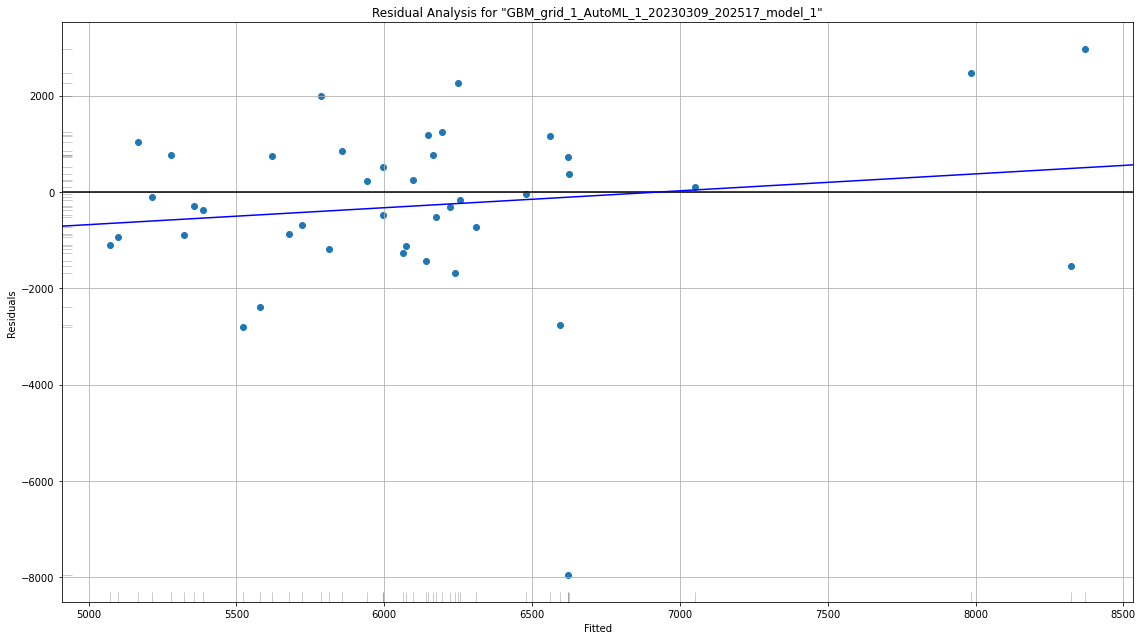

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

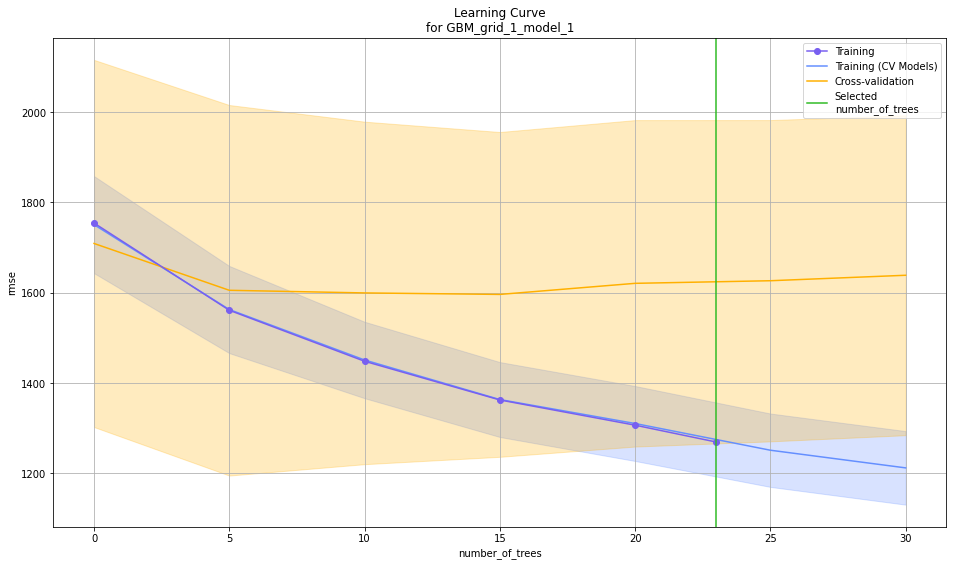

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

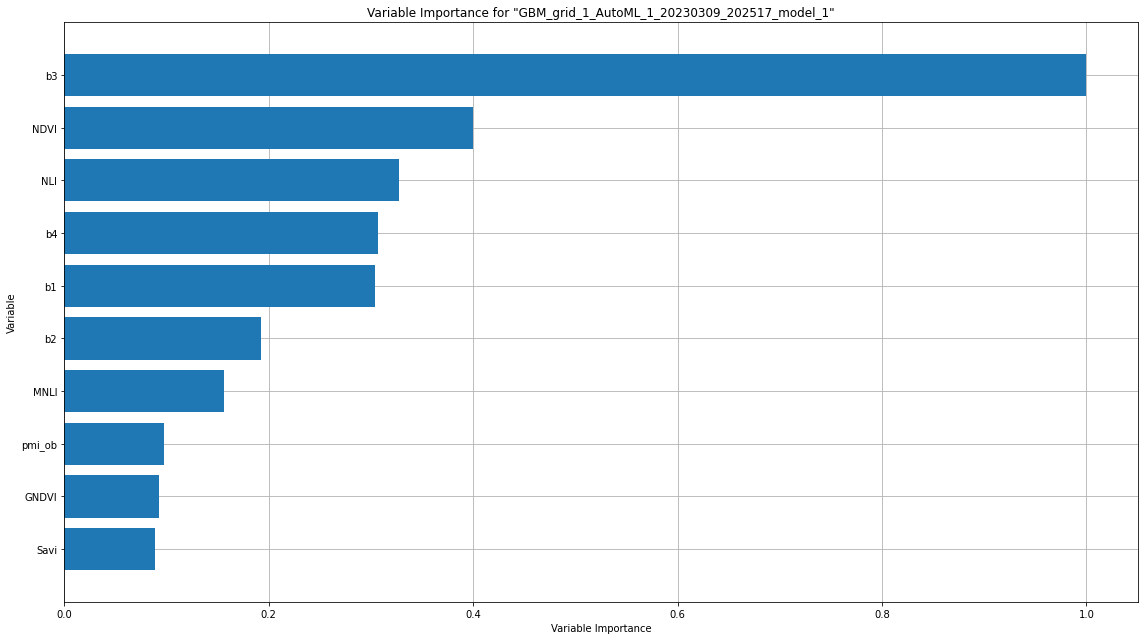

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

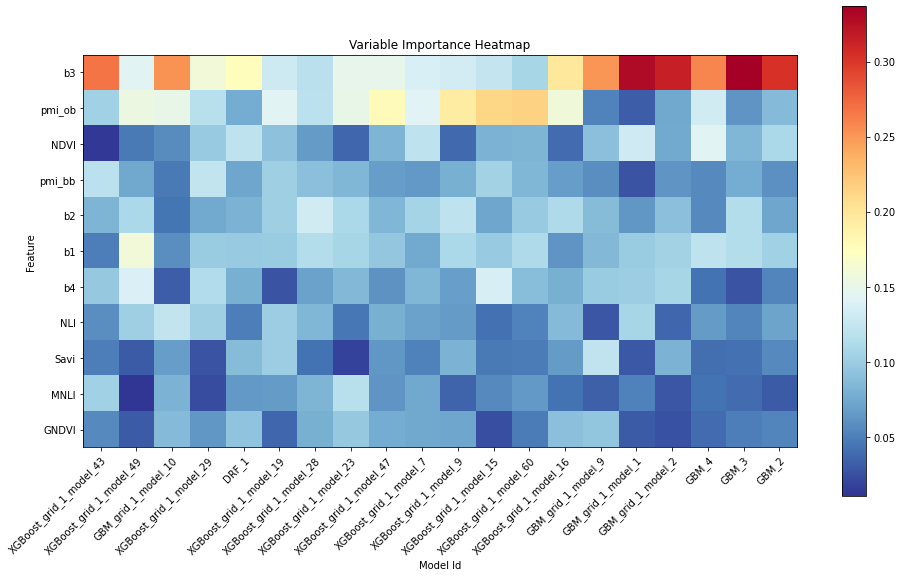

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

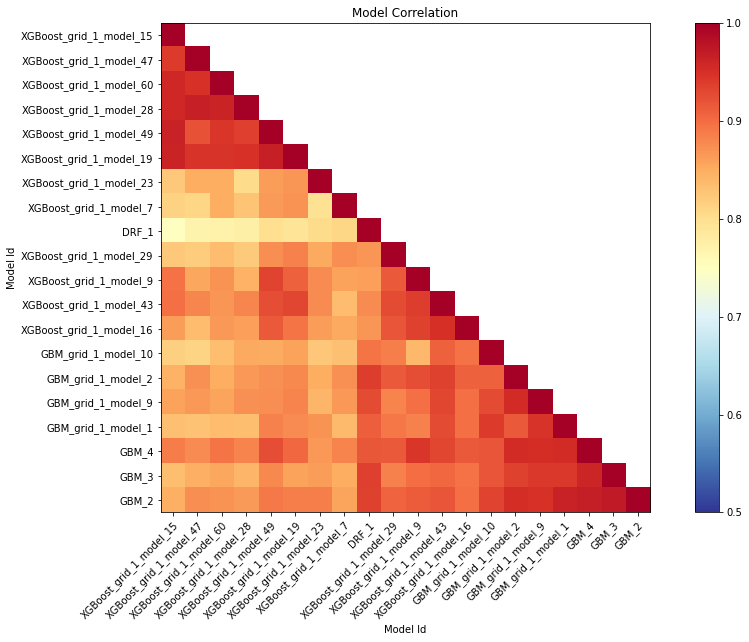

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

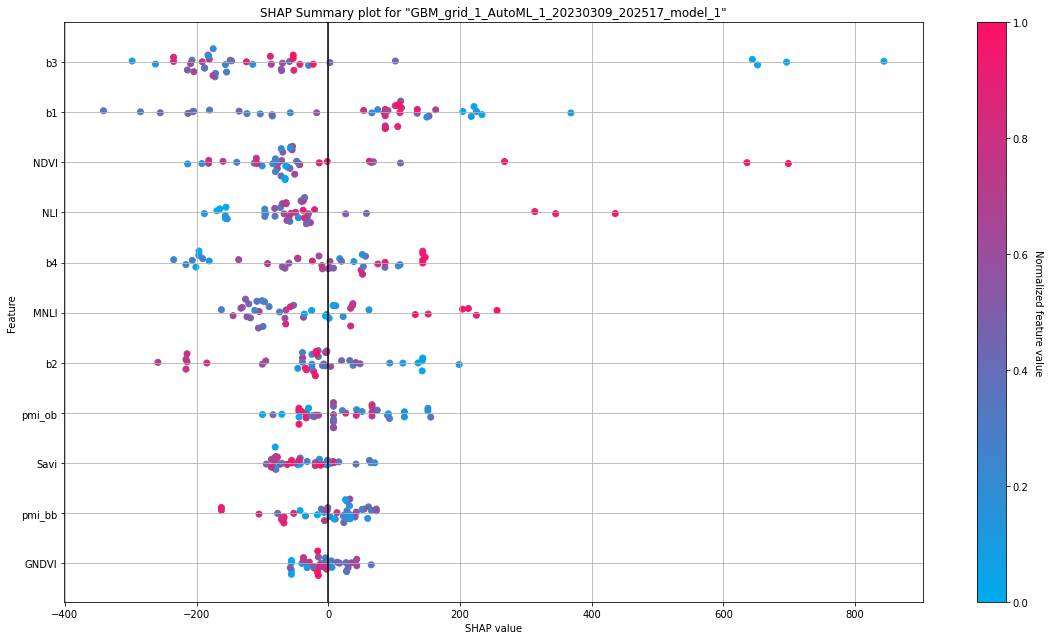

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

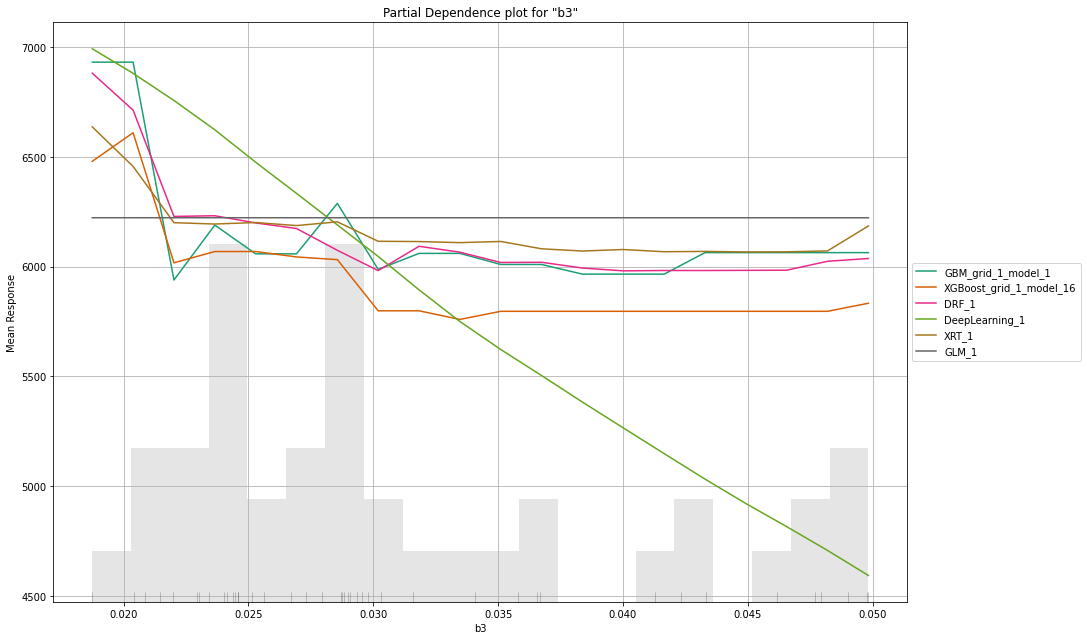

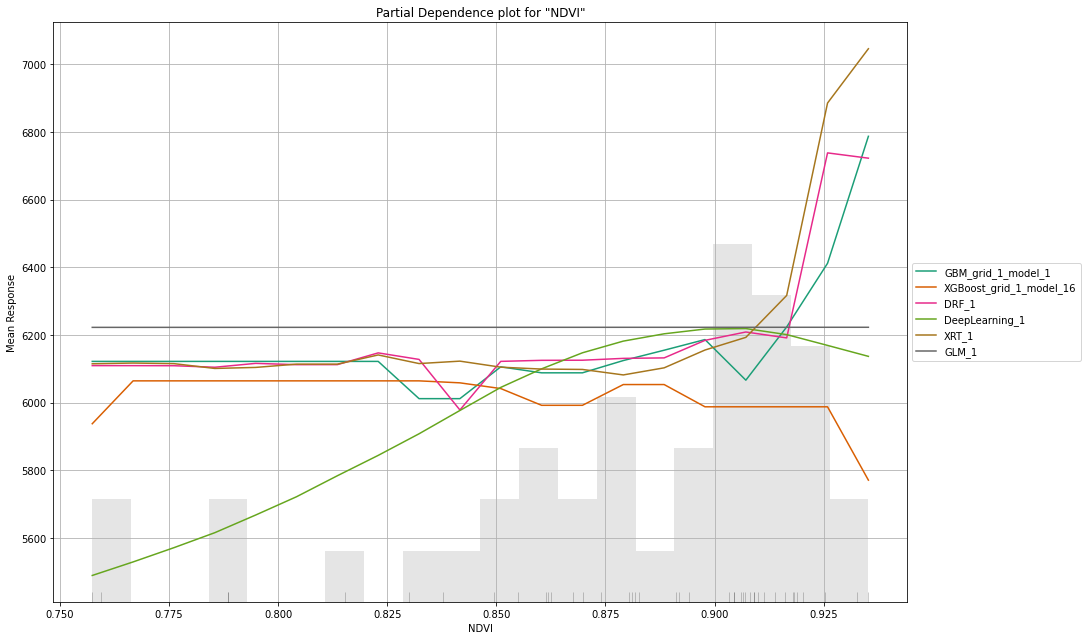

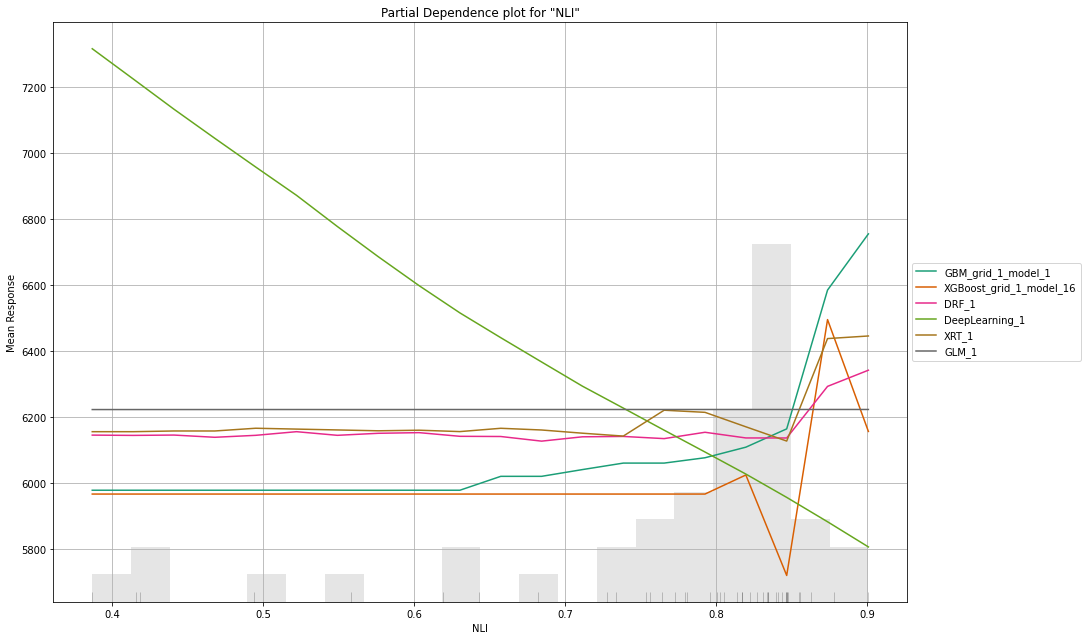

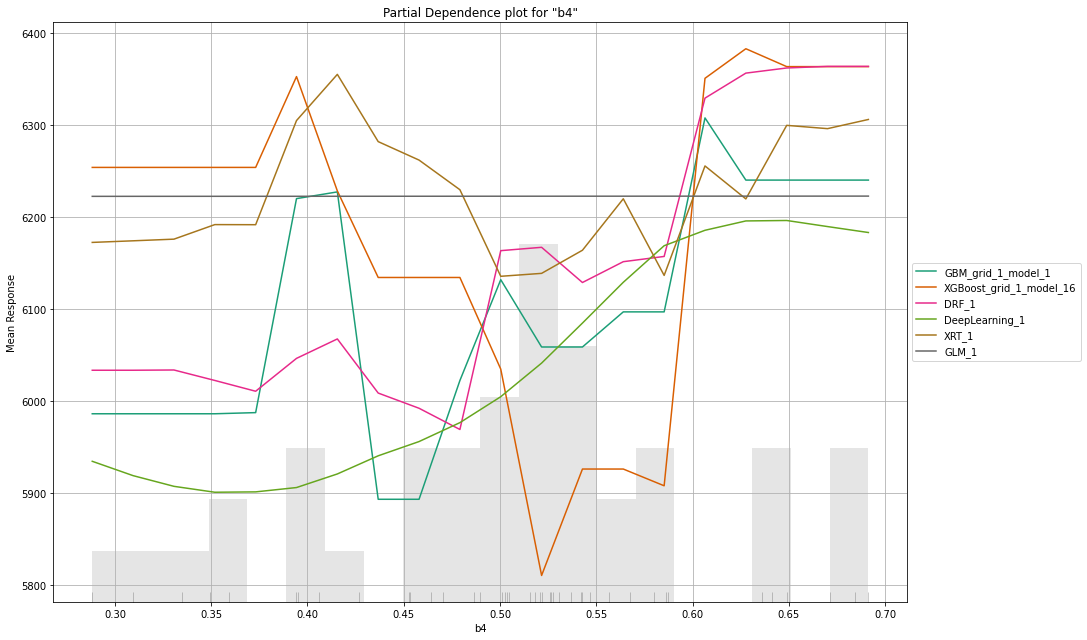

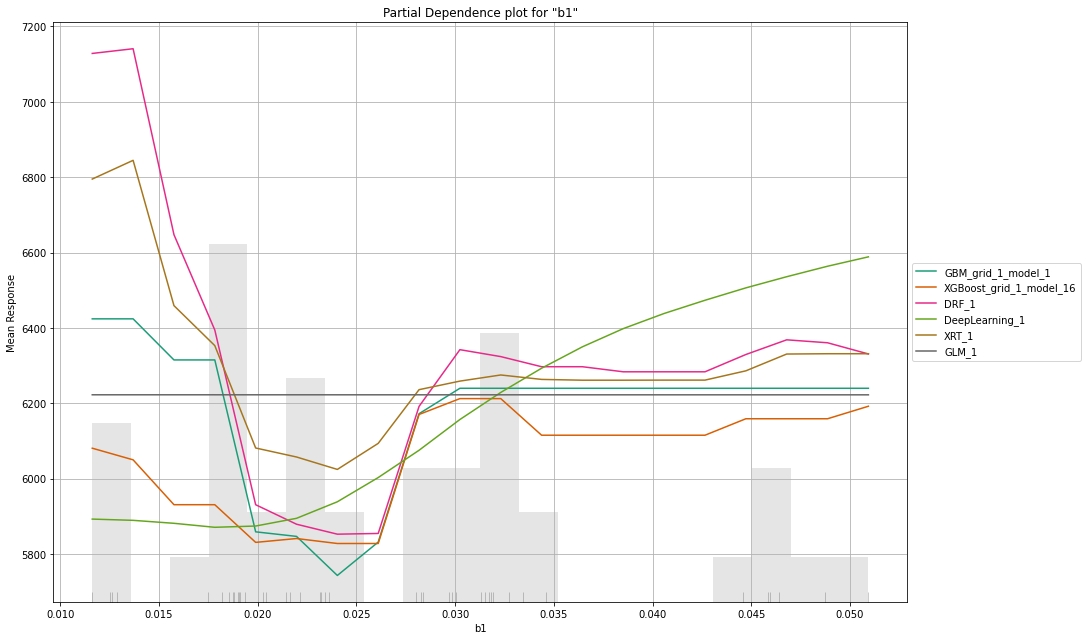

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

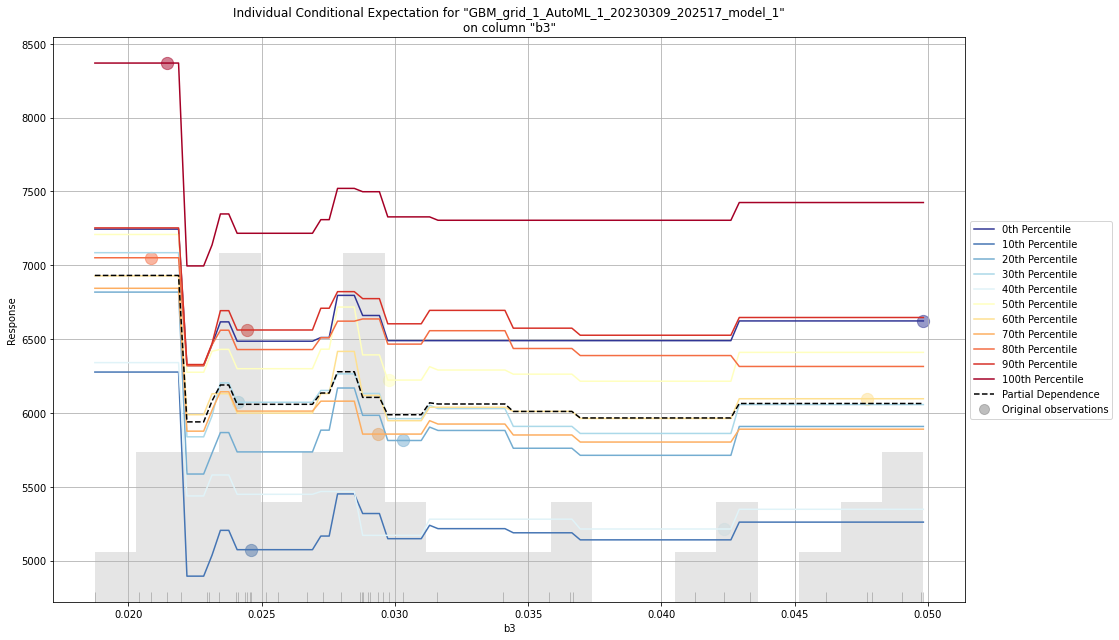

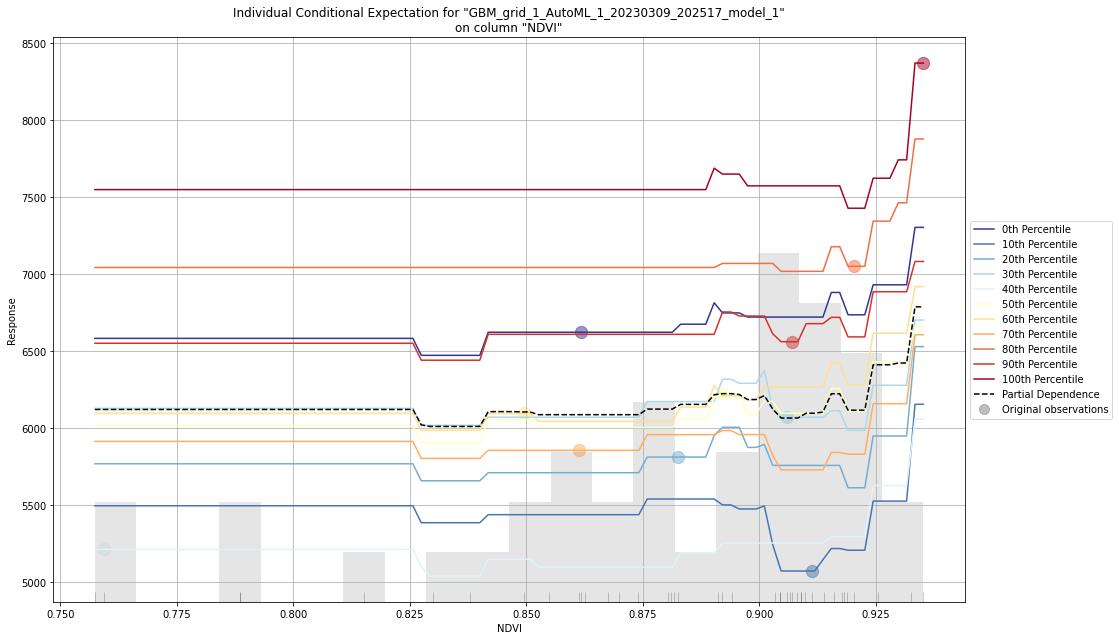

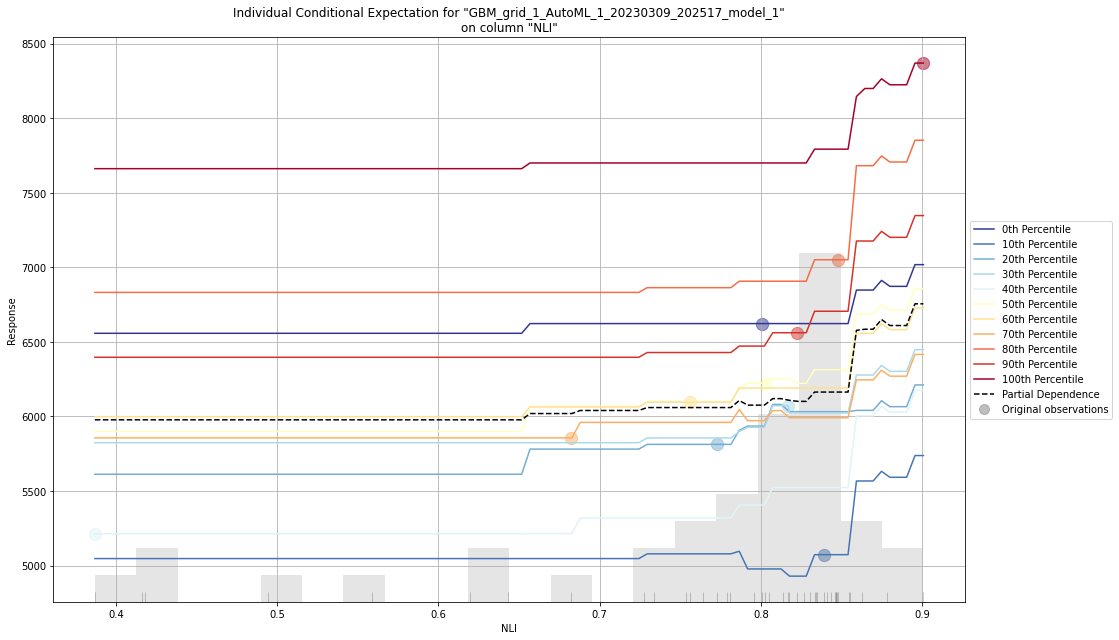

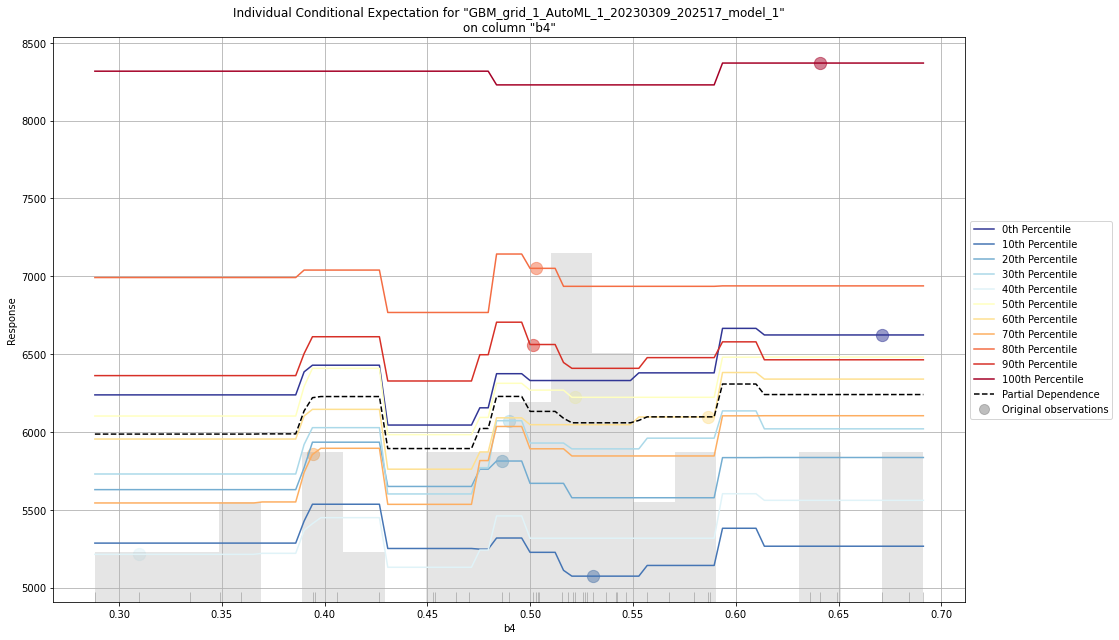

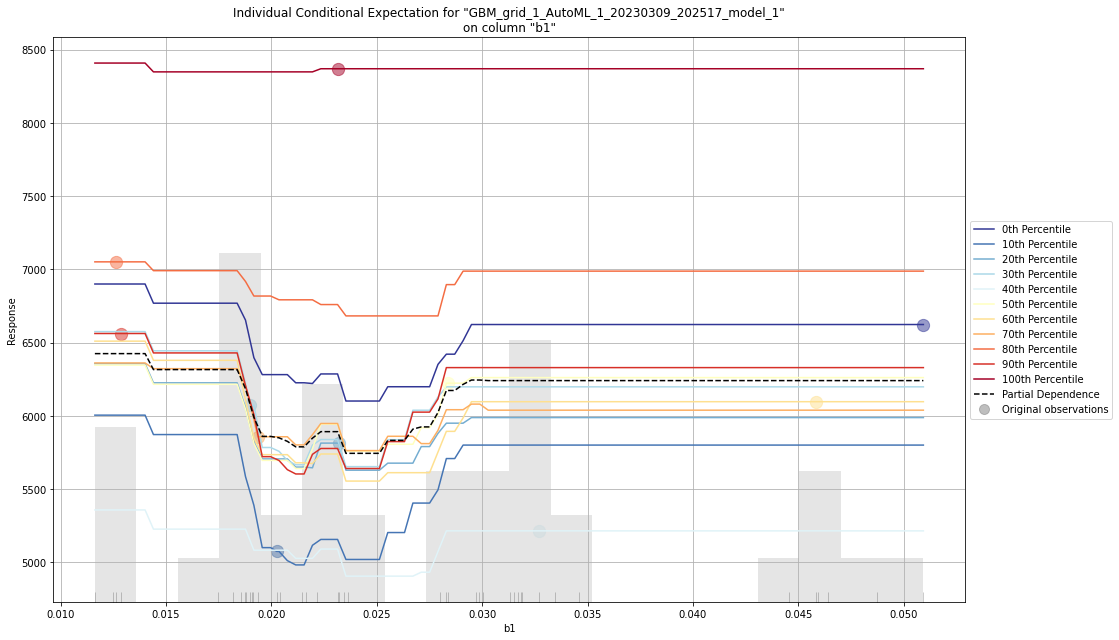

In [10]:
exa = aml.explain(test)

In [11]:
aml.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20230309_202517_model_1,1789.66,3.20289e+06,1220.54,nan,3.20289e+06
XGBoost_grid_1_AutoML_1_20230309_202517_model_16,1802.69,3.24968e+06,1210.12,nan,3.24968e+06
XGBoost_grid_1_AutoML_1_20230309_202517_model_19,1806.91,3.26492e+06,1184.26,nan,3.26492e+06
XGBoost_grid_1_AutoML_1_20230309_202517_model_43,1816.02,3.29792e+06,1182.66,nan,3.29792e+06
GBM_2_AutoML_1_20230309_202517,1819.3,3.30987e+06,1226.69,nan,3.30987e+06
GBM_grid_1_AutoML_1_20230309_202517_model_9,1819.49,3.31055e+06,1221.05,nan,3.31055e+06
XGBoost_grid_1_AutoML_1_20230309_202517_model_23,1826.09,3.33461e+06,1189.34,nan,3.33461e+06
GBM_grid_1_AutoML_1_20230309_202517_model_2,1829.47,3.34698e+06,1250.82,nan,3.34698e+06
XGBoost_grid_1_AutoML_1_20230309_202517_model_49,1830.3,3.34999e+06,1228.49,nan,3.34999e+06
GBM_4_AutoML_1_20230309_202517,1830.71,3.35152e+06,1202.33,nan,3.35152e+06


In [12]:
perf = aml.leader.model_performance(train)
perf

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1610802.6472168225
RMSE: 1269.1740019464717
MAE: 973.3312431674794
RMSLE: 0.2054031443364577
Mean Residual Deviance: 1610802.6472168225

In [13]:
perf = aml.leader.model_performance(test)
perf

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 3202889.52521848
RMSE: 1789.6618466119457
MAE: 1220.5417806925502
RMSLE: NaN
Mean Residual Deviance: 3202889.52521848

In [20]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL',)
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid_1_AutoML_3_20230309_164030_model_6,1142.76,1.3059e+06,916.034,0.284578,1.3059e+06,15778,0.056283,DeepLearning
DeepLearning_grid_1_AutoML_3_20230309_164030_model_2,1164.96,1.35714e+06,916.787,0.302712,1.35714e+06,13974,0.013622,DeepLearning
XGBoost_grid_1_AutoML_3_20230309_164030_model_16,1170.03,1.36897e+06,969.19,0.290602,1.36897e+06,59,0.014119,XGBoost
DeepLearning_grid_1_AutoML_3_20230309_164030_model_1,1176.24,1.38353e+06,944.716,0.278609,1.38353e+06,20693,0.013289,DeepLearning
XRT_1_AutoML_3_20230309_164030,1180.19,1.39285e+06,951.668,0.297951,1.39285e+06,374,0.021003,DRF
GBM_grid_1_AutoML_3_20230309_164030_model_8,1191.19,1.41894e+06,971.437,0.335338,1.41894e+06,144,0.019641,GBM
GBM_grid_1_AutoML_3_20230309_164030_model_21,1192.03,1.42094e+06,999.162,0.317076,1.42094e+06,124,0.017839,GBM
DRF_1_AutoML_3_20230309_164030,1202.97,1.44714e+06,959.437,0.303068,1.44714e+06,168,0.018822,DRF
XGBoost_grid_1_AutoML_3_20230309_164030_model_20,1205.65,1.4536e+06,968.191,0.310338,1.4536e+06,347,0.205703,XGBoost
XGBoost_grid_1_AutoML_3_20230309_164030_model_31,1207.26,1.45748e+06,1001.08,0.305116,1.45748e+06,66,0.029683,XGBoost


In [21]:
pred = aml.leader.predict(test)
pred

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict
4018.23
3639.59
2893.13
4096.19
4808.14
4261.52
5799.75
2385.46
2350.67
3430.59


In [23]:
obs = h2o.as_list(test["pod_kgha"])
pred = h2o.as_list(pred["predict"])

In [24]:
import pandas as pd
automl = pd.DataFrame({'Actual': obs["pod_kgha"], 'Predicted': pred["predict"]})
automl

,Actual,Predicted
0,4879.024497,4018.230423
1,3164.408503,3639.591493
2,3487.628410,2893.130666
3,5044.214917,4096.194939
4,4300.054748,4808.140434
5,4443.861184,4261.521192
6,7792.620975,5799.754750
7,1174.621791,2385.462942
8,3143.694771,2350.671993
9,1789.501312,3430.591103


In [25]:
automl.to_csv(r'/content/drive/My Drive/MTR/automl_pod_pred_allpmi.txt', index=None, sep='\t', mode='a')

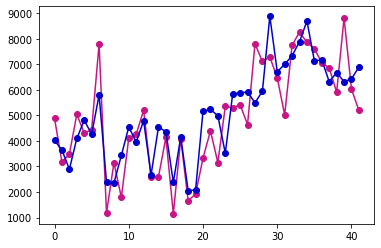

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot('Actual', data=automl, marker='o', color='mediumvioletred')
plt.plot('Predicted', data=automl, marker='o', color='mediumblue')
plt.show()

In [36]:
#saving the leader model
aml.leader.save_mojo('/content/drive/My Drive/MTR/auto_ml_all_pmi)')

'/content/drive/My Drive/MTR/auto_ml_all_pmi)/DeepLearning_grid_1_AutoML_3_20230309_164030_model_6.zip'

In [37]:
imported_model = h2o.import_mojo('/content/drive/My Drive/MTR/auto_ml_all_pmi)')
#new_observations = h2o.import_file(path='new_observations.csv')
#predictions = imported_model.predict(new_observations)

generic Model Build progress: |██████████████████████████████████████████████████| (done) 100%


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

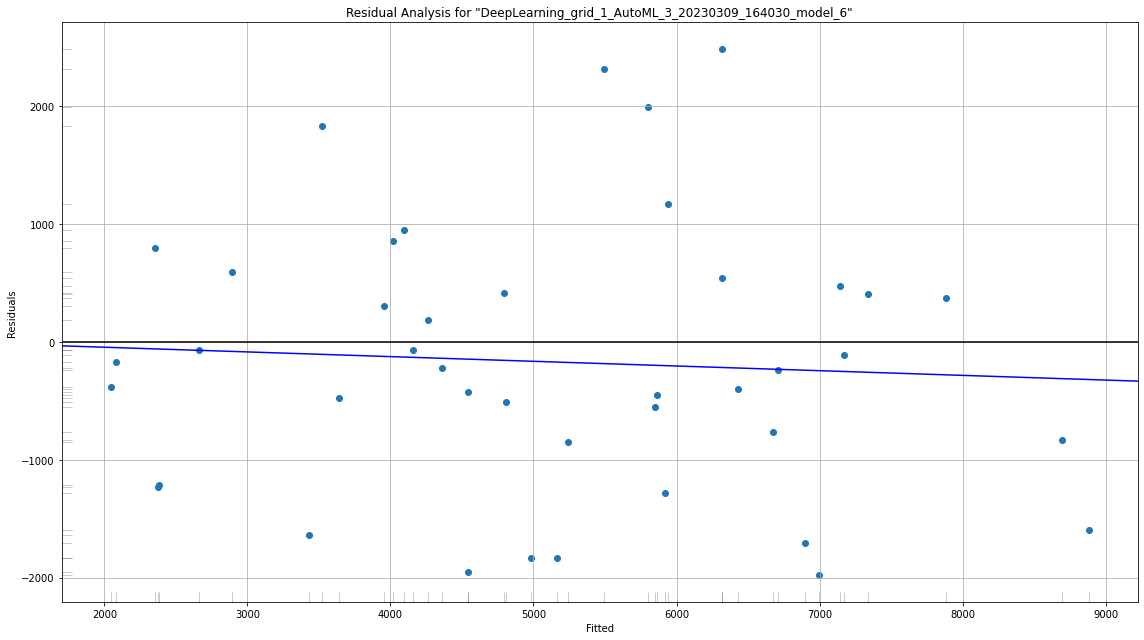

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

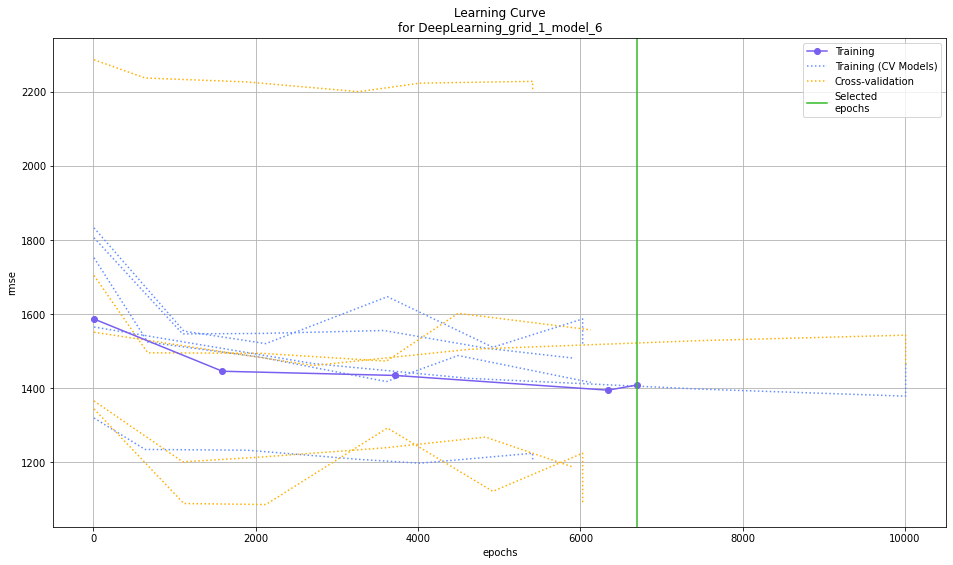

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

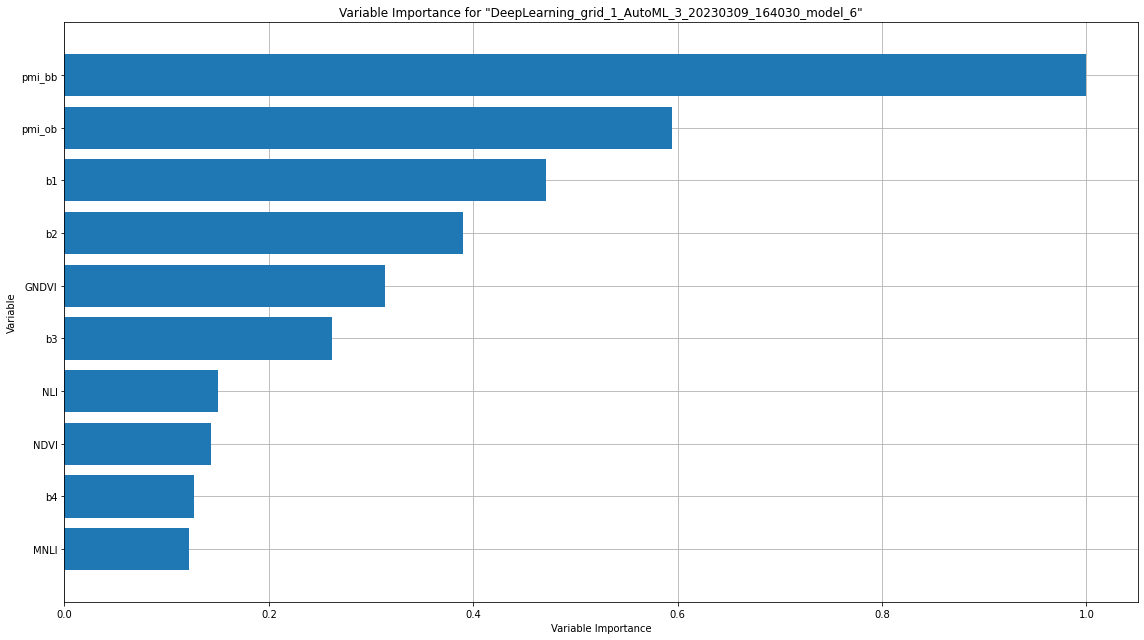

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

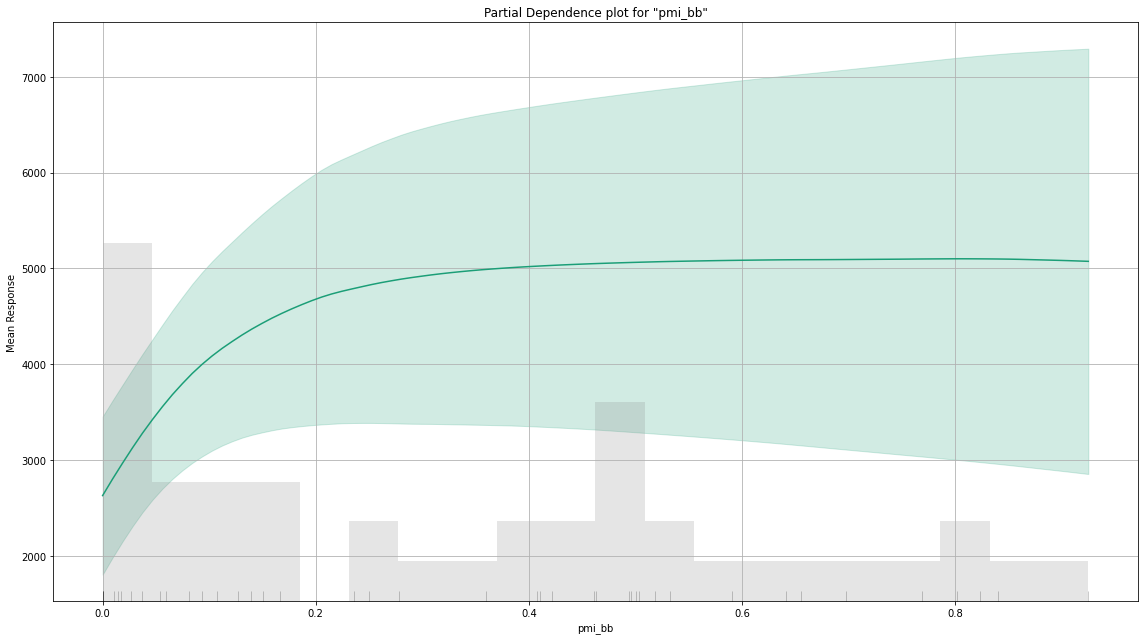

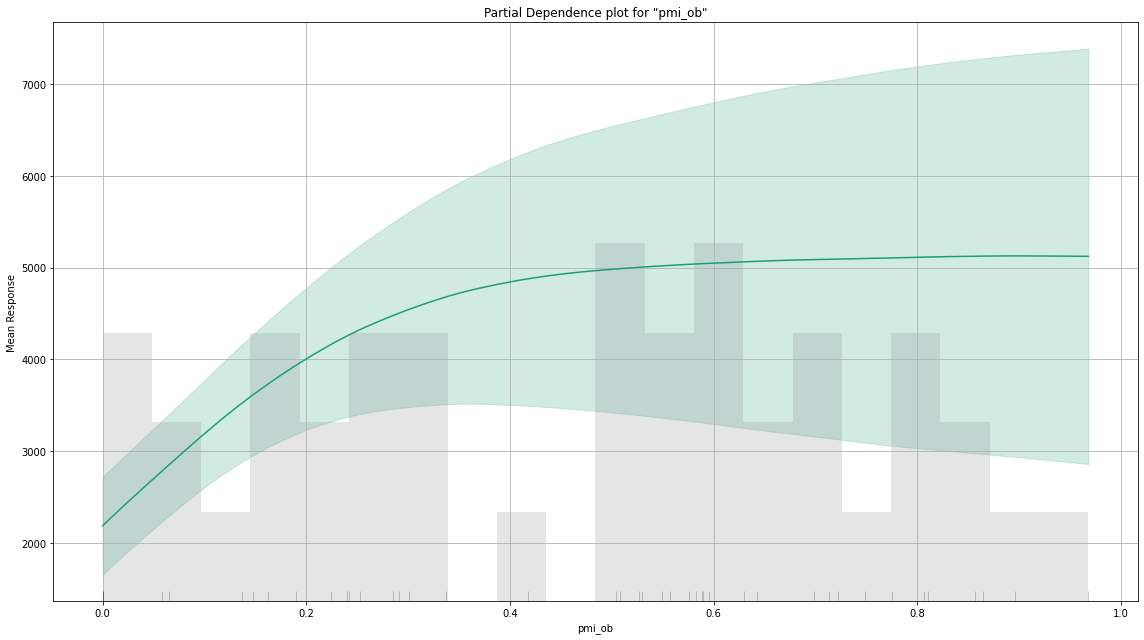

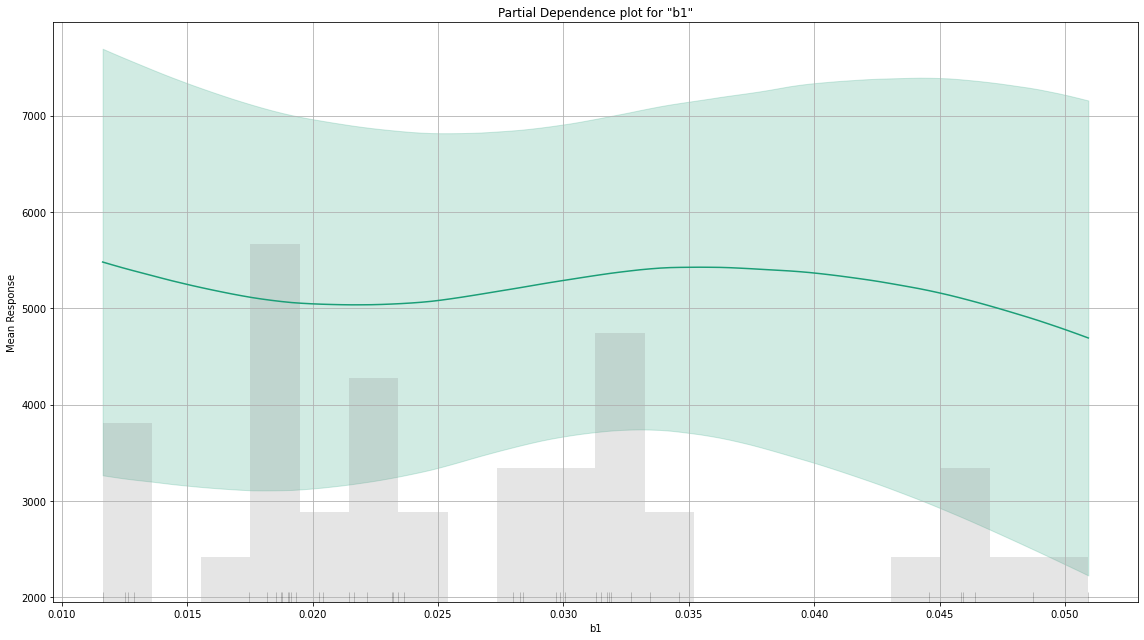

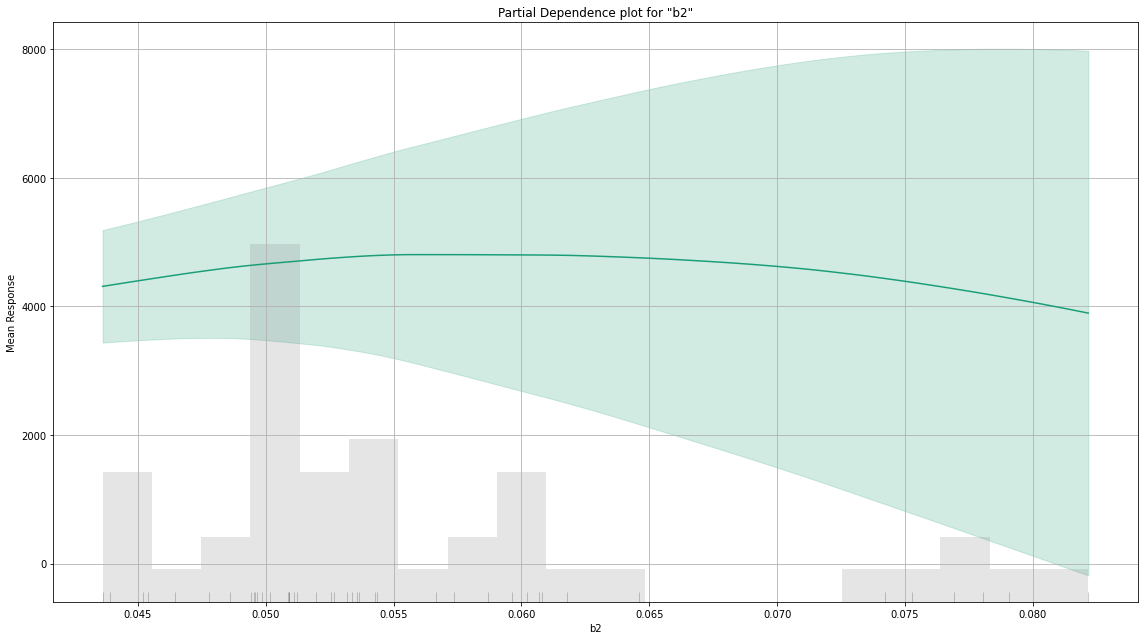

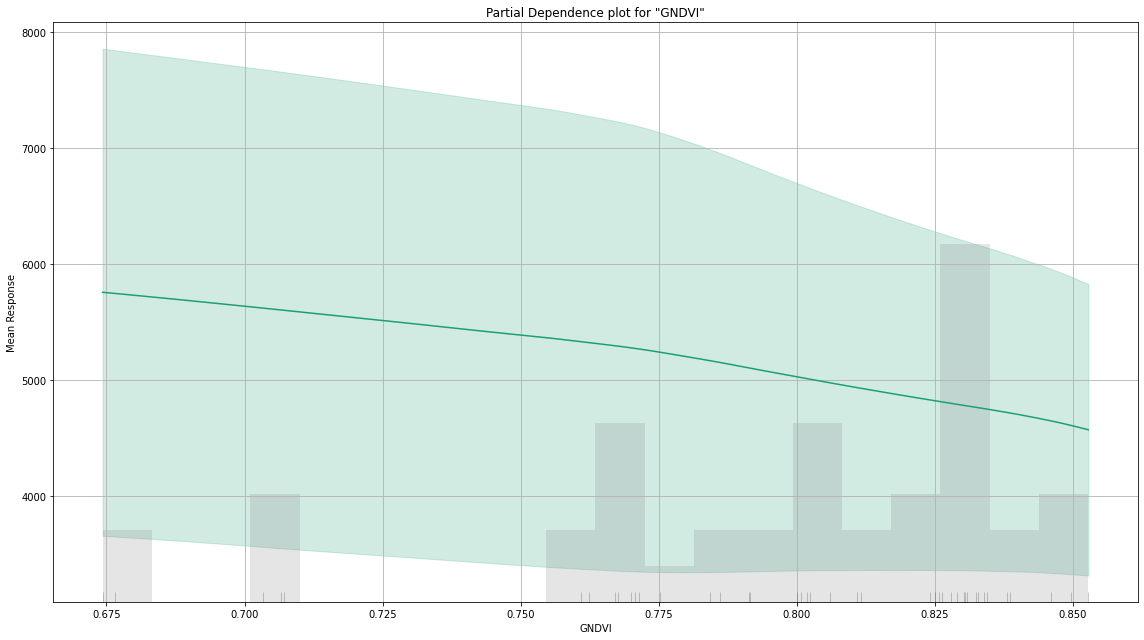

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

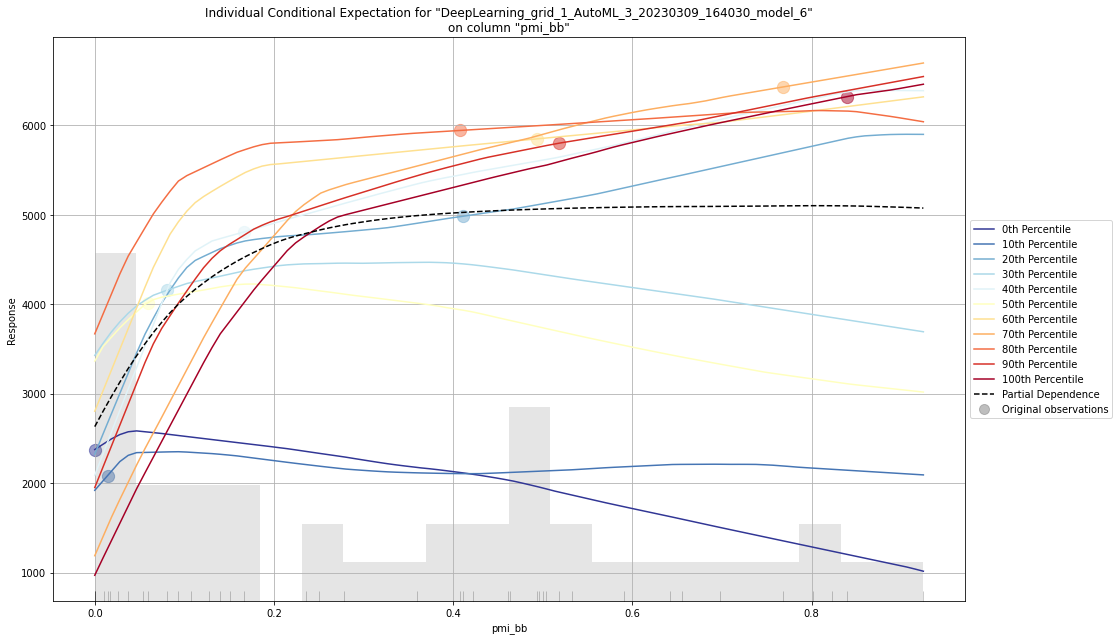

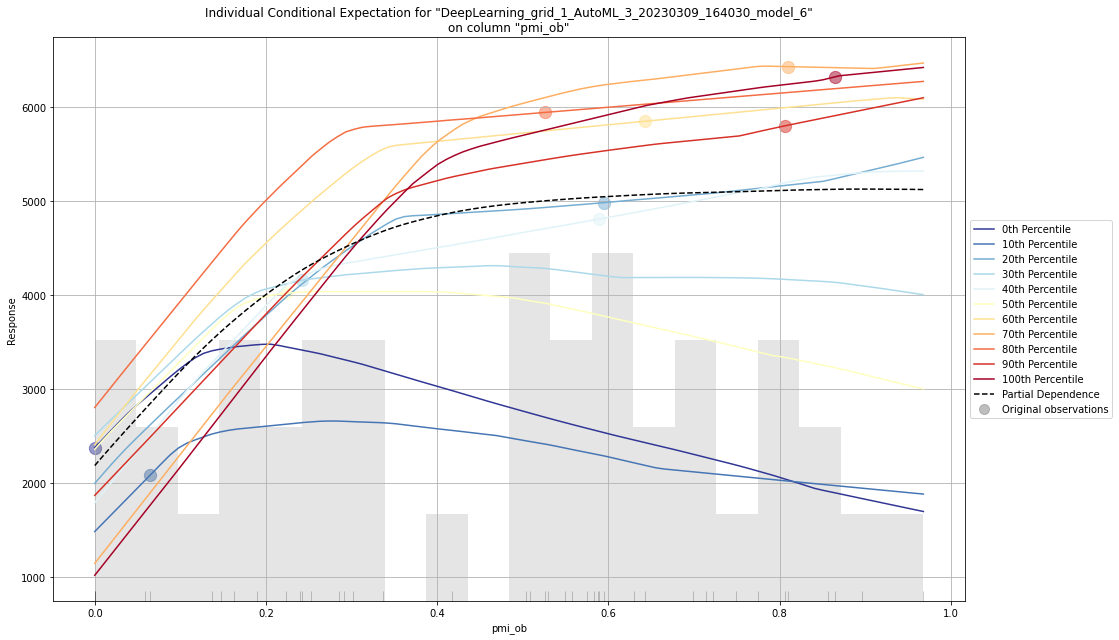

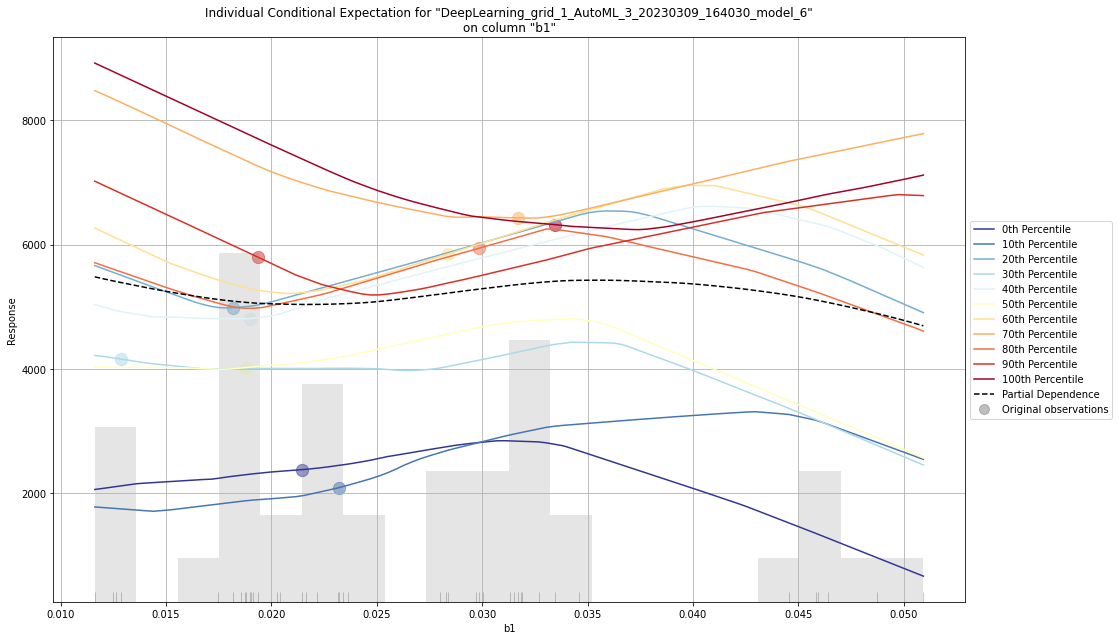

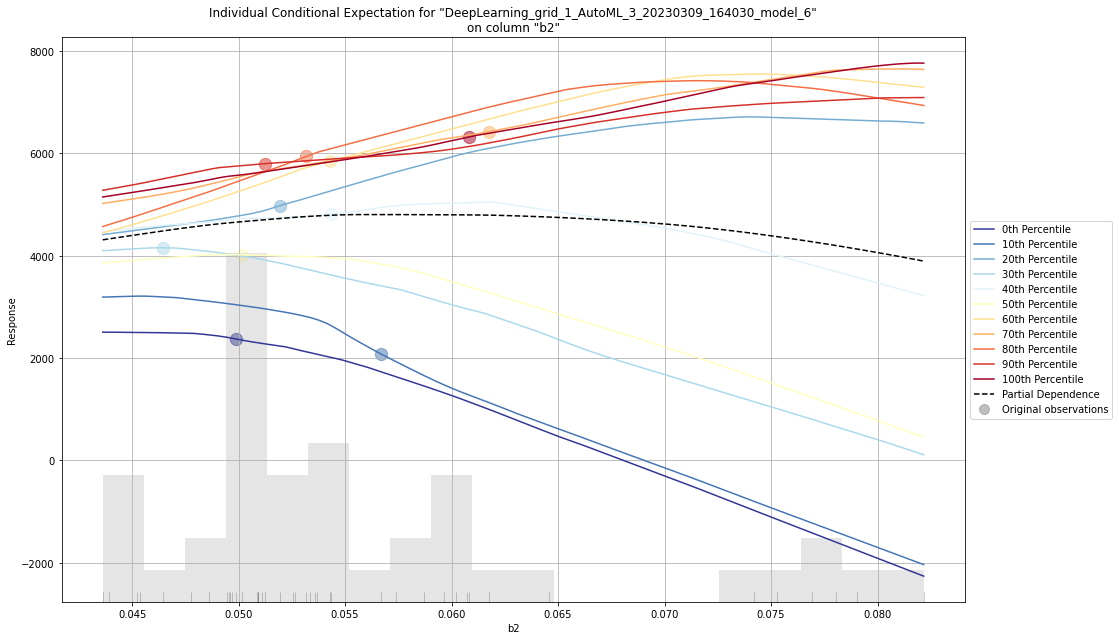

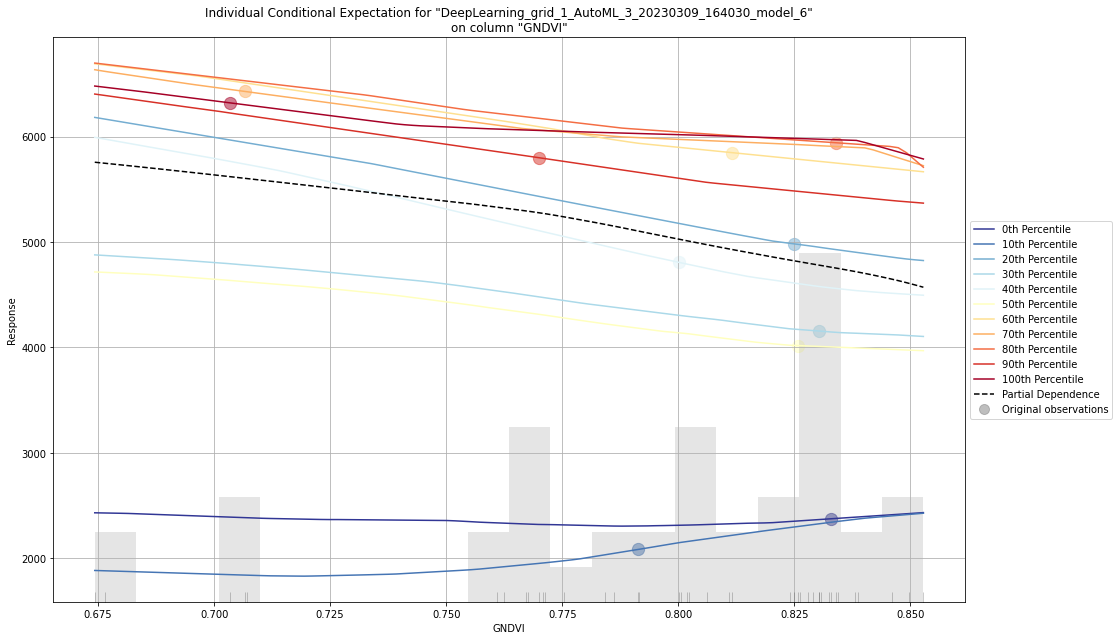

In [27]:
exm = aml.leader.explain(test)

In [30]:
from h2o.explanation import shap_explain_row_plot


In [31]:
shapr_plot = aml.leader.shap_explain_row_plot(test, row_index=0)

H2OTypeError: ignored

In [28]:
shap_plot = aml.leader.shap_summary_plot(test)

H2OTypeError: ignored

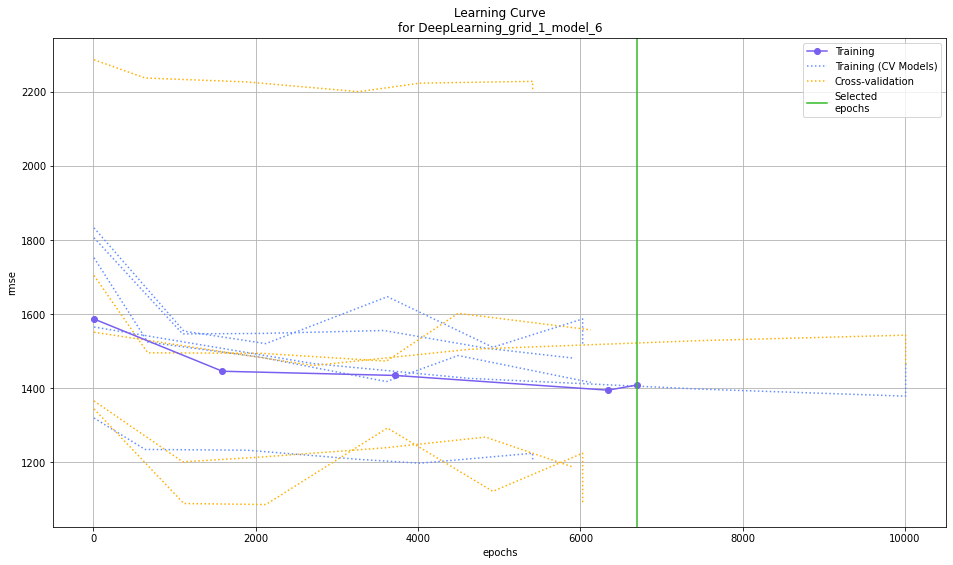

In [32]:
learning_curve_plot = aml.leader.learning_curve_plot()

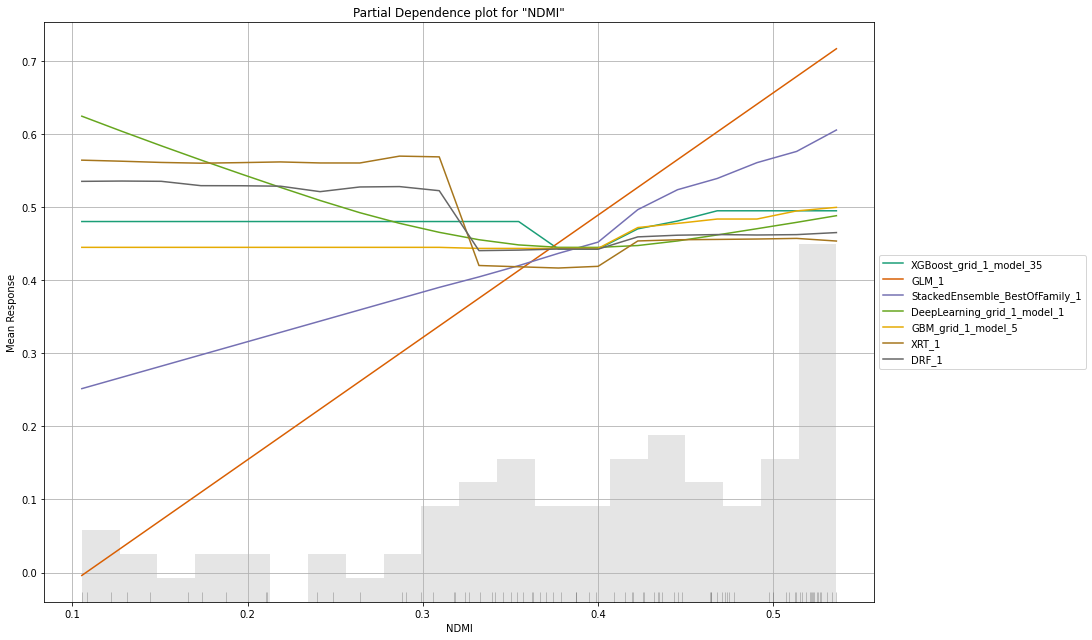

In [ ]:
pd_plot = aml.pd_multi_plot(train, 'NDMI')

In [ ]:
test_map = h2o.import_file('/content/drive/My Drive/Code Tedesco18/all_t18_m.txt')
test_map.head(2)

Parse progress: |█████████████████████████████████████████████████████████| 100%


blue,green,red,nir,twi,yield
0.10605,0.09582,0.07378,0.34732,8.06511,181.206
0.10592,0.0958,0.07322,0.34592,8.06511,180.809


In [ ]:
pred_test_map = aml.leader.model_performance(test_map)
pred_test_map


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 96.78658388803419
RMSE: 9.838017274229305
MAE: 6.910628006335435
RMSLE: 0.05911083679212948
R^2: 0.8485551186861485
Mean Residual Deviance: 96.78658388803419
Null degrees of freedom: 99600
Residual degrees of freedom: 99596
Null deviance: 63653995.71742746
Residual deviance: 9640040.541832093
AIC: 738093.8016923537


In [ ]:
pred_test = aml.leader.predict(test_map)
pred_test

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
187.264
182.08
182.713
174.547
172.612
169.45
160.648
168.449
189.784
175.376


In [ ]:
pred_map = h2o.as_list(pred_test["predict"])
pred_map

,predict
0,187.263882
1,182.080413
2,182.713257
3,174.547167
4,172.612411
...,...
99596,199.971799
99597,201.984642
99598,195.931316
99599,186.950775


In [ ]:
import pandas as pd
automl_map = pd.DataFrame({'Predicted': pred_map["predict"]})
automl_map

,Predicted
0,187.263882
1,182.080413
2,182.713257
3,174.547167
4,172.612411
...,...
99596,199.971799
99597,201.984642
99598,195.931316
99599,186.950775


In [ ]:
automl_map.to_csv(r'/content/drive/My Drive/Code Tedesco18/all_t18_m_pred.txt', index=None, sep='\t', mode='a')
